In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 50)
#import os 
#os.getcwd()
#os.chdir("C:\\Users\\jay kumar\\Downloads")
df=pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2]:
df.shape


(9240, 37)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
df = df.replace('Select',np.nan)

In [6]:
df_null = df.isnull().sum()/len(df)*100
df_null = df_null.sort_values(ascending = False)
df_null
df_null_40 = list(df_null[df_null>=40].index)
df_null_40

['How did you hear about X Education',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index']

In [7]:
df.drop(columns = ['How did you hear about X Education',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index'] , inplace = True)

In [8]:
df.shape

(9240, 30)

In [9]:
df_null = df.isnull().sum()/len(df)*100
df_null = df_null.sort_values(ascending = False)
df_null

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

#### 1) Checking the value of City

In [10]:
df["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [11]:
df["City"].fillna("Mumbai" , inplace = True)

In [12]:
df_null = df.isnull().sum()/len(df)*100
df_null = df_null.sort_values(ascending = False)
df_null

Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
City                                              0.000000
I agree to pay the amount through cheque          0.0000

In [13]:
df["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

#### 2) Checking the values of Specialization


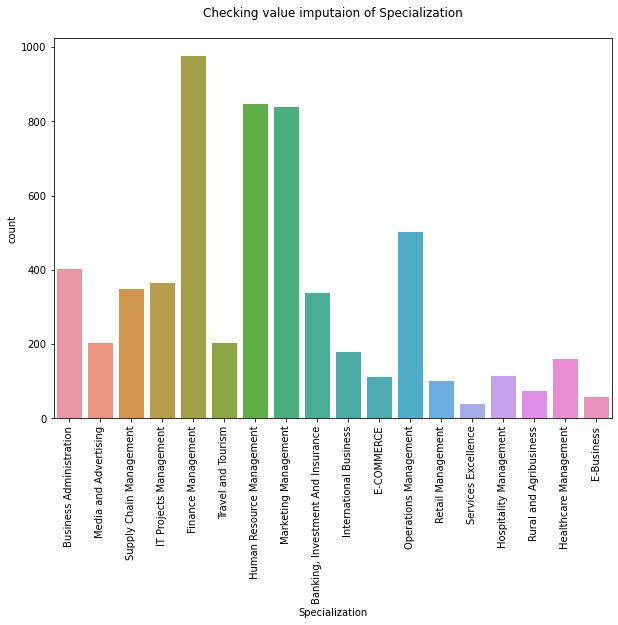

In [14]:
plt.figure(figsize = (10,7))
sns.countplot(df["Specialization"])
plt.xticks(rotation = 90)
plt.title("Checking value imputaion of Specialization\n")
plt.show()

- It is possible that the lead may leave this column blank if he may be a student or not having any specialization or his specialization is not there in the options given. So we can create a another category 'Others' for this.

In [15]:
df["Specialization"].replace({np.nan: "Oyhers"} ,inplace = True)

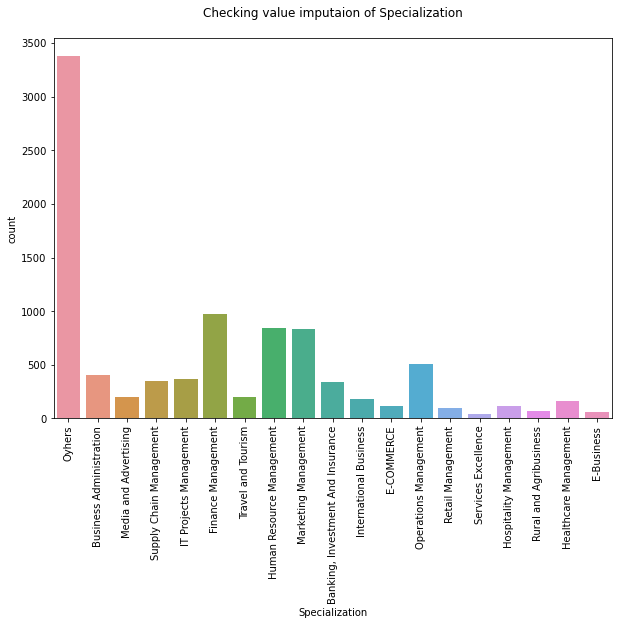

In [16]:
plt.figure(figsize = (10,7))
sns.countplot(df["Specialization"])
plt.xticks(rotation = 90)
plt.title("Checking value imputaion of Specialization\n")
plt.show()

In [17]:
df_null = df.isnull().sum()/len(df)*100
df_null = df_null.sort_values(ascending = False)
df_null

Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
City                                              0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

#### 4) Checking the value of Yags

In [18]:
df["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

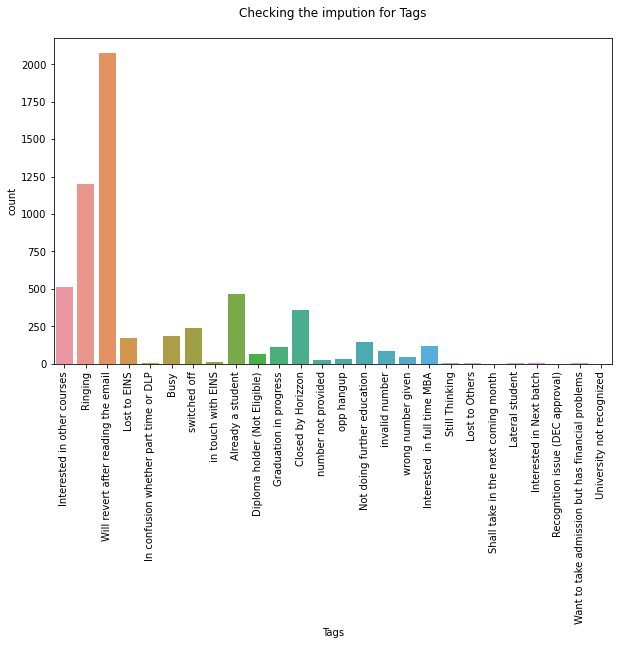

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(df["Tags"])
plt.xticks(rotation = 90)
plt.title("Checking the impution for Tags\n")
plt.show()

In [20]:
df["Tags"].replace({np.nan:"Others"} , inplace = True)

In [21]:
df_null = df.isnull().sum()/len(df)*100
df_null = df_null.sort_values(ascending = False)
df_null

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Tags                                              0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
City                                              0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

#### 5) Checking the value of "What matters most to you in choosing a course"

In [22]:
df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [23]:
plt.figure(figsize = (10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

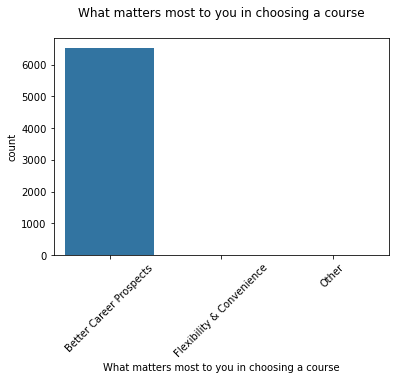

In [24]:
sns.countplot(df['What matters most to you in choosing a course'])
plt.xticks(rotation=45)
plt.title('What matters most to you in choosing a course\n')
plt.show()

- This columns is highly inbalance for "What matters most to you in choosing a course". We can drop this columns simply.

In [25]:
df.drop(columns = "What matters most to you in choosing a course" , inplace = True)

In [26]:
df_null = df.isnull().sum()/len(df)*100
df_null = df_null.sort_values(ascending = False)
df_null

What is your current occupation             29.112554
Country                                     26.634199
TotalVisits                                  1.482684
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Lead Source                                  0.389610
Prospect ID                                  0.000000
Through Recommendations                      0.000000
Receive More Updates About Our Courses       0.000000
Tags                                         0.000000
Update me on Supply Chain Content            0.000000
Newspaper                                    0.000000
Get updates on DM Content                    0.000000
City                                         0.000000
I agree to pay the amount through cheque     0.000000
A free copy of Mastering The Interview       0.000000
Digital Advertisement                        0.000000
Search                                       0.000000
X Education Forums          

#### 6) Checking the values of 'What is your current occupation'

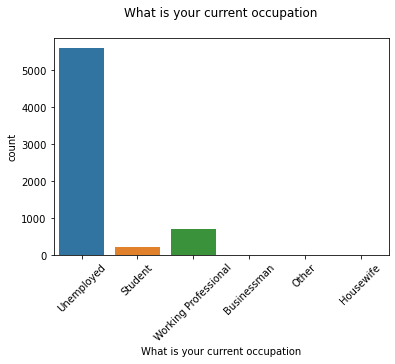

In [27]:
sns.countplot(df['What is your current occupation'])
plt.xticks(rotation=45)
plt.title('What is your current occupation\n')
plt.show()

In [28]:
round(df["What is your current occupation"].value_counts(normalize = True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

- There are 85% value , located to "Unemployes". So replace all null to acroos this.

In [29]:
df["What is your current occupation"].replace({np.nan :"Unemployed"}, inplace = True)

In [30]:
df_null = df.isnull().sum()/len(df)*100
df_null = df_null.sort_values(ascending = False)
df_null

Country                                     26.634199
TotalVisits                                  1.482684
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Lead Source                                  0.389610
Prospect ID                                  0.000000
Digital Advertisement                        0.000000
Through Recommendations                      0.000000
Receive More Updates About Our Courses       0.000000
Tags                                         0.000000
Update me on Supply Chain Content            0.000000
X Education Forums                           0.000000
Get updates on DM Content                    0.000000
City                                         0.000000
I agree to pay the amount through cheque     0.000000
A free copy of Mastering The Interview       0.000000
Newspaper                                    0.000000
Search                                       0.000000
Newspaper Article           

#### 7)  Check Column 'Country' 

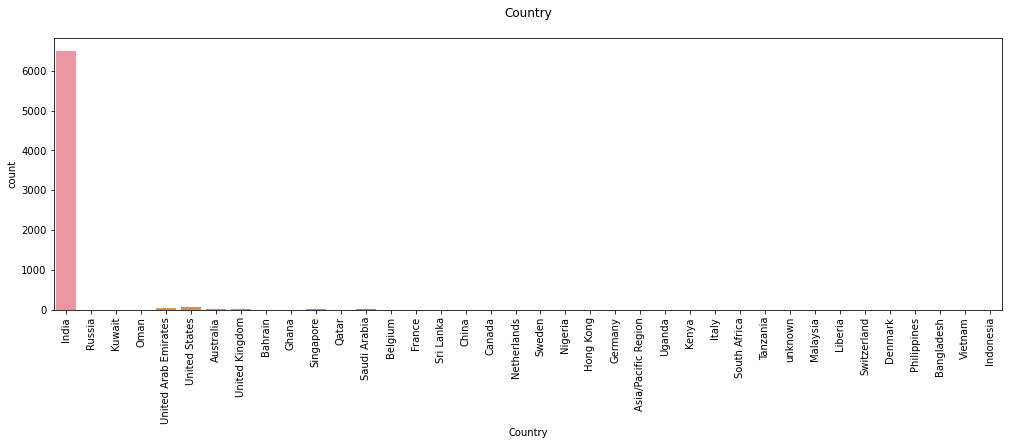

In [31]:
plt.figure(figsize=(17,5))
sns.countplot(df['Country'])
plt.xticks(rotation=90)
plt.title('Country\n')
plt.show()

In [32]:
df["Country"].replace({np.nan:"India"} , inplace = True)

In [33]:
df_null = df.isnull().sum()/len(df)*100
df_null = df_null.sort_values(ascending = False)
df_null

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Prospect ID                                 0.000000
X Education Forums                          0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
City                                        0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Tags                                        0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
Search                                      0.000000
Newspaper Article                           0.000000
Magazine                                    0.

#### 8) Checking the values of 'City'

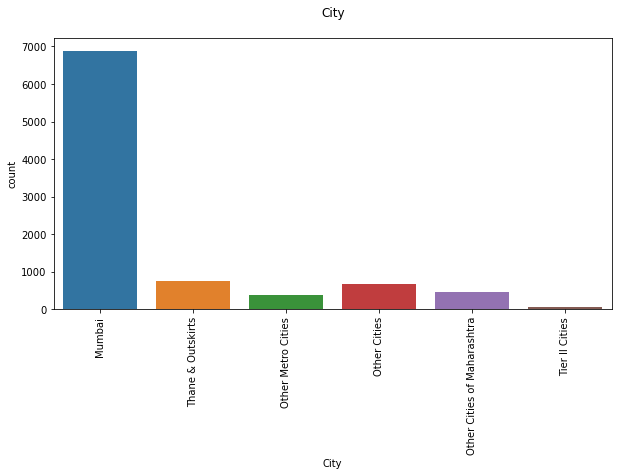

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(df['City'])
plt.xticks(rotation=90)
plt.title('City\n')
plt.show()

In [35]:
round(df['City'].value_counts(normalize=True),2)*100

Mumbai                         75.0
Thane & Outskirts               8.0
Other Cities                    7.0
Other Cities of Maharashtra     5.0
Other Metro Cities              4.0
Tier II Cities                  1.0
Name: City, dtype: float64

In [36]:
df['City'].replace({np.nan:'Mumbai'} , inplace = True)

In [37]:
df_null = df.isnull().sum()/len(df)*100
df_null = df_null.sort_values(ascending = False)
df_null

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Prospect ID                                 0.000000
X Education Forums                          0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
City                                        0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Tags                                        0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
Search                                      0.000000
Newspaper Article                           0.000000
Magazine                                    0.

#### Rest missing values are drop if missing values is greter then 70%

In [38]:
df_null_rows = df.isnull().sum(axis = 0)

In [39]:
df_null_rows = df_null_rows.sort_values(ascending = False)*100
df_null_rows_70 = df_null_rows[df_null_rows>70]
df_null_rows_70

TotalVisits             13700
Page Views Per Visit    13700
Last Activity           10300
Lead Source              3600
dtype: int64

In [40]:
df.dropna(  inplace = True , axis = 0)

In [41]:
df_null = df.isnull().sum()/len(df)*100
df_null = df_null.sort_values(ascending = False)
df_null

Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
What is your current occupation             0.0
Specialization                              0.0
Country                                     0.0
Last Activity                               0.0
Page Views Per Visit                    

In [42]:
(len(df.index)/9240)*100

98.2034632034632

- Retaines rows after imputation






- Checking for duplicates:.

In [43]:
df[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


- No duplicate values with rows are available in our data.

### Univariate Analysis and Bivariate Analysis

####  1) Converted

- Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [44]:
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

- Ther are 38% converted ration in our data.

#### 2) Lead Origin

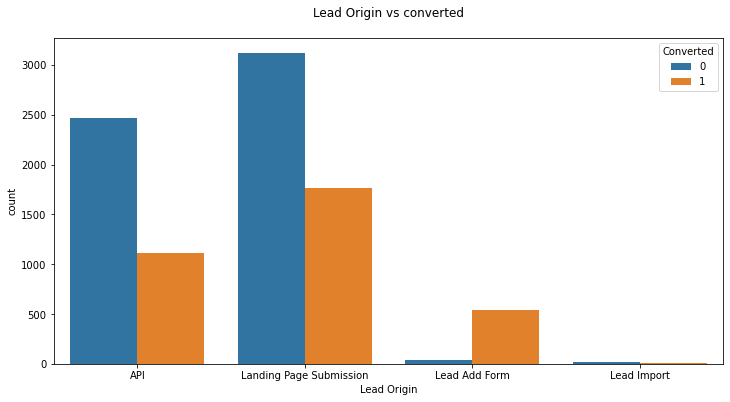

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
plt.title('Lead Origin vs converted\n')
plt.show()

- API and Landing Page Submission have lower conversion rate but count of lead originated from them are high. Lead Add Form has more than higher conversion rate but count of lead are fewer.

- To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

#### 3) Lead Source

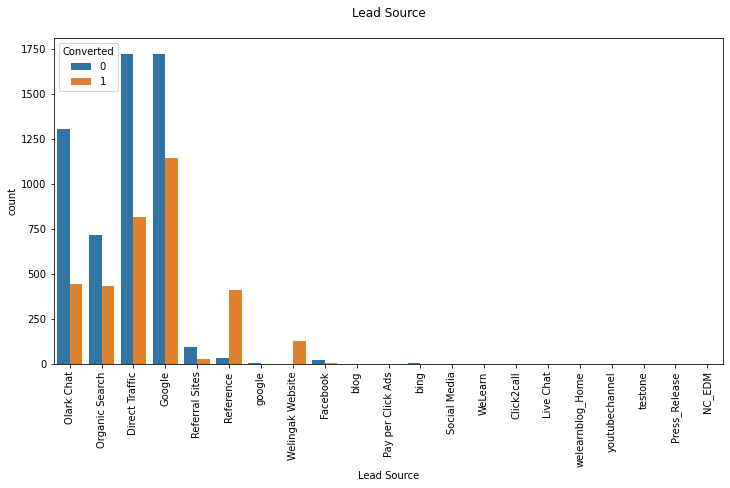

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.title('Lead Source\n')
plt.xticks(rotation = 90)
plt.show()

- Need to replace 'google' with 'Google'.
- Creating a new category 'Others' for some of the Lead Sources which do not have much values.

In [47]:
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release','Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')


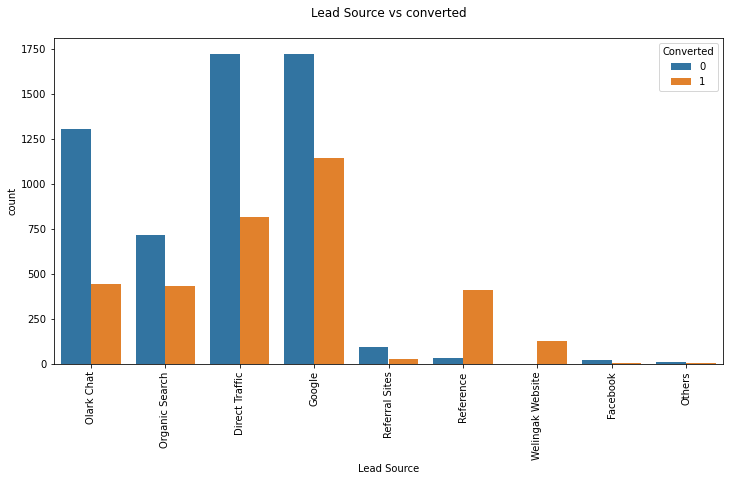

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.title('Lead Source vs converted\n')
plt.xticks(rotation = 90)
plt.show()

- Google and Direct traffic generates maximum number of leads.
- Conversion Rate of reference leads and leads through welingak website is high.
- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

### 4) Do not Email

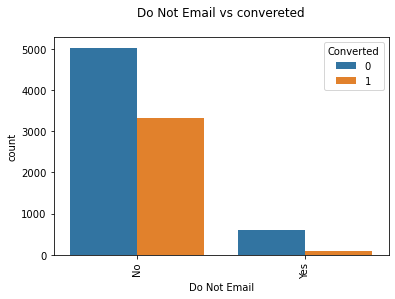

In [49]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.title('Do Not Email vs convereted\n')
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

### 5) Do not call

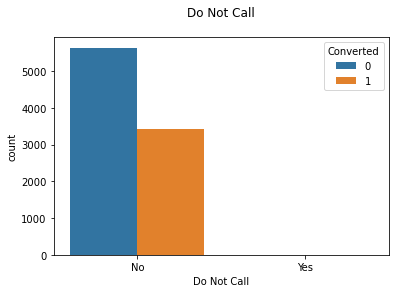

In [50]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = df)
plt.title('Do Not Call\n')
plt.show()

#### 6) TotalVisits

In [51]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

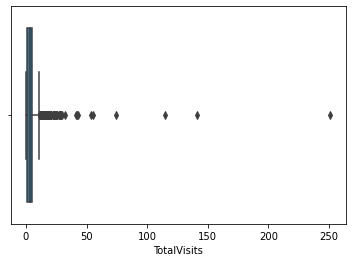

In [52]:
sns.boxplot(df['TotalVisits'])
plt.show()

- As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [53]:
percentile = df['TotalVisits'].quantile([0.05,0.95]).values

df['TotalVisits'][df['TotalVisits'] <= percentile[0]] = percentile[0]
df['TotalVisits'][df['TotalVisits'] >= percentile[1]] = percentile[1]


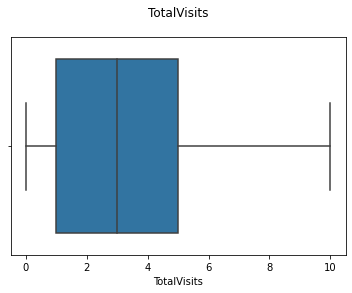

In [54]:
sns.boxplot(df['TotalVisits'])
plt.title('TotalVisits\n')
plt.show()

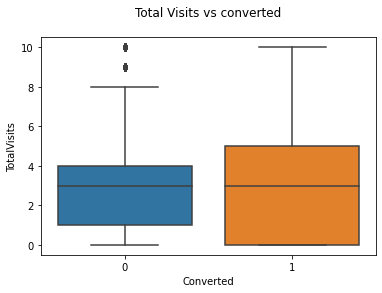

In [55]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.title('Total Visits vs converted\n')
plt.show()

- Nothing can be concluded on the basis of Total Visits due to same median for "Converted" & "Not Converted".

#### 7) Total Time Spent on Website

In [56]:
df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

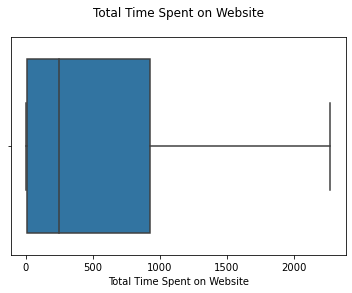

In [57]:
sns.boxplot(df['Total Time Spent on Website'])
plt.title('Total Time Spent on Website\n')
plt.show()

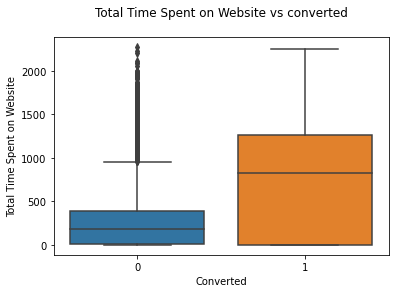

In [58]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df,)
plt.title('Total Time Spent on Website vs converted\n')
plt.show()

- Leads spending more time on websites most likely as "Converted"

#### 8) Page Views Per Visit


In [59]:
df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

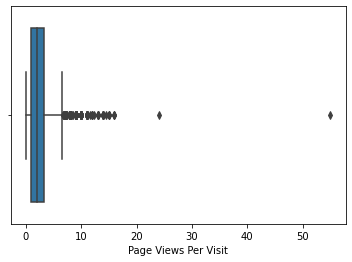

In [60]:
sns.boxplot(df['Page Views Per Visit'])
plt.show()

In [61]:
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles [1]

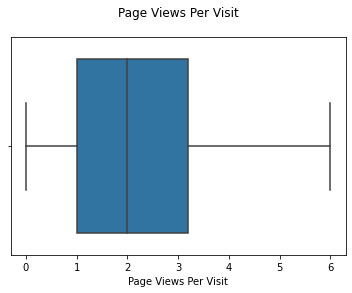

In [62]:
sns.boxplot(df['Page Views Per Visit'])
plt.title('Page Views Per Visit\n')
plt.show()

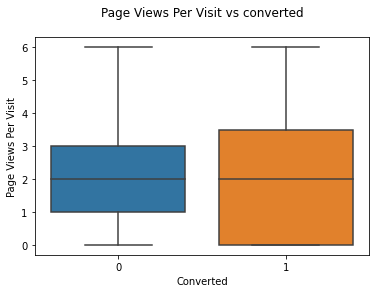

In [63]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =df)
plt.title('Page Views Per Visit vs converted\n')
plt.show()

- Median for converted and unconverted leads is the same.

#### 9) Last Activity

In [64]:
df['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

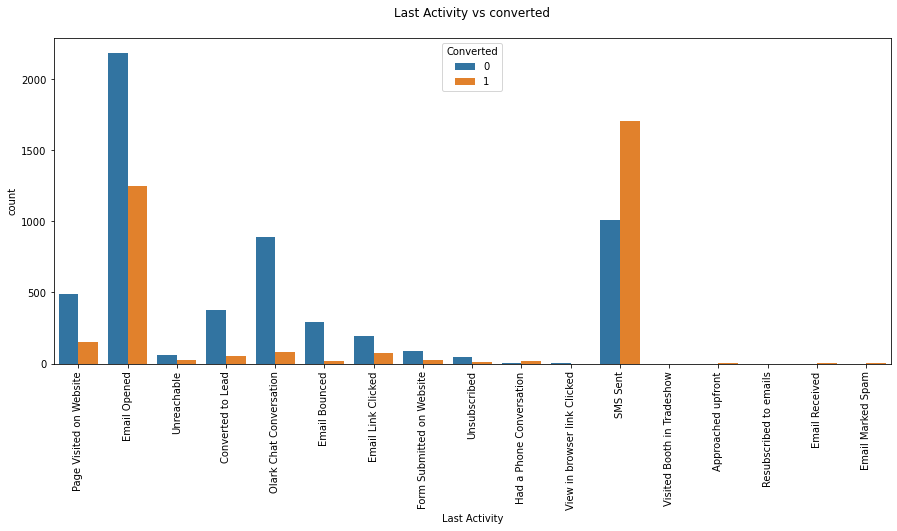

In [65]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.title('Last Activity vs converted\n')
plt.show()

In [66]:
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
'Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Others')

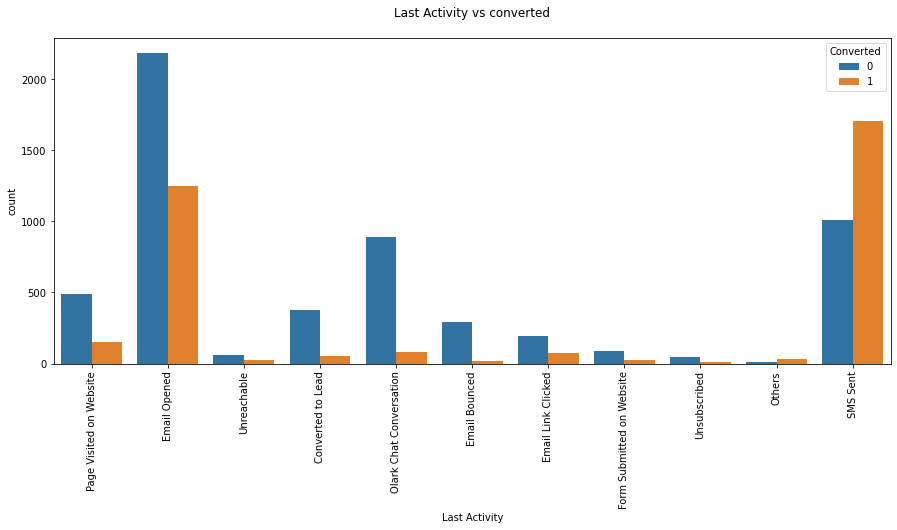

In [67]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.title('Last Activity vs converted\n')
plt.show()

- Most of the lead have their Email opened as their last activity.Conversion rate for leads with last activity as SMS Sent is high.

#### 10) Country

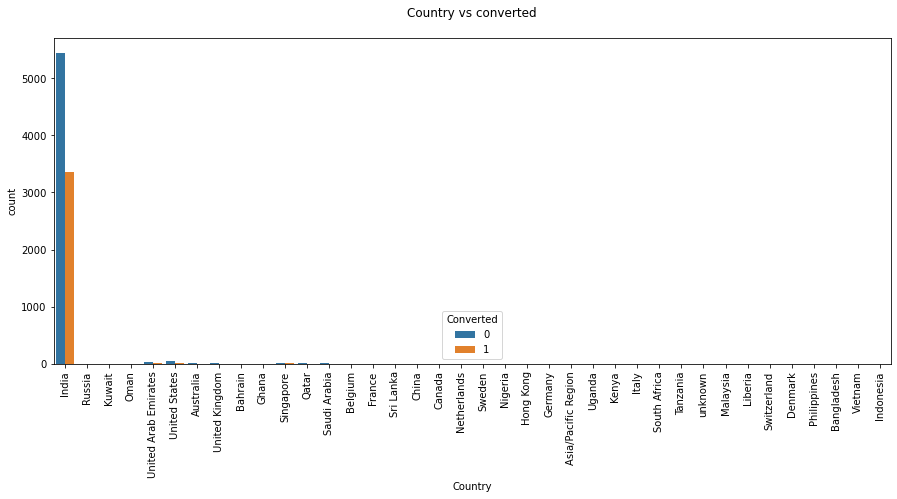

In [68]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.title('Country vs converted\n')
plt.show()

- Most values are 'India' no such inference can be drawn.

#### 11) Specialization

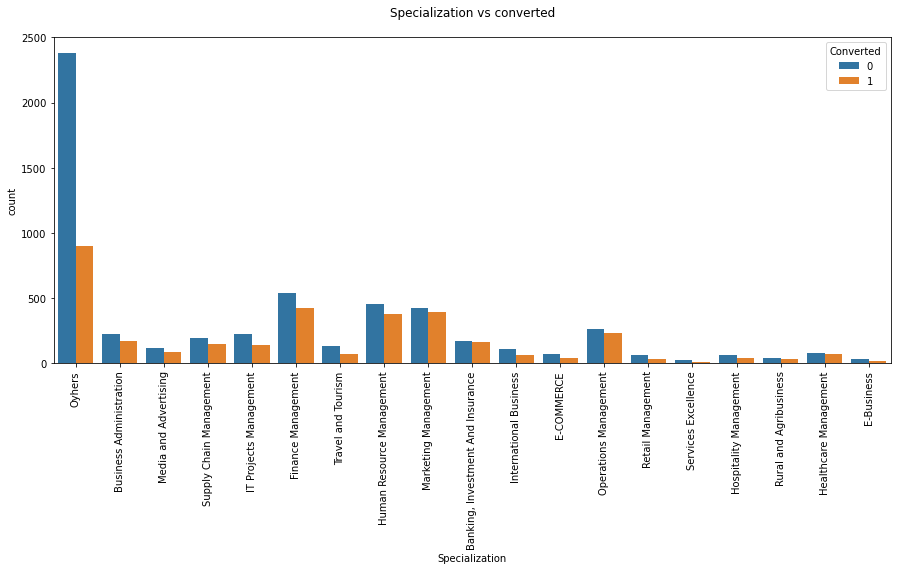

In [69]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.title('Specialization vs converted\n')
plt.show()

- Focus should be more on the Specialization with high conversion rate.

#### 12) What is your current occupation

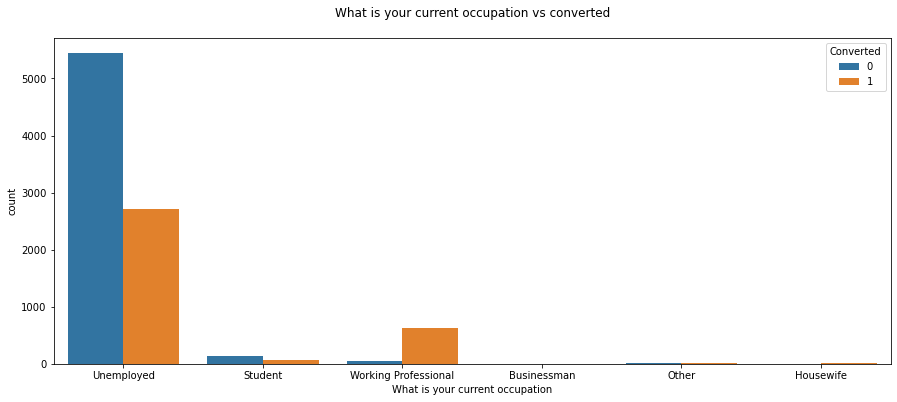

In [70]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
plt.title('What is your current occupation vs converted\n')
plt.show()

- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in numbers.

#### 13) Search

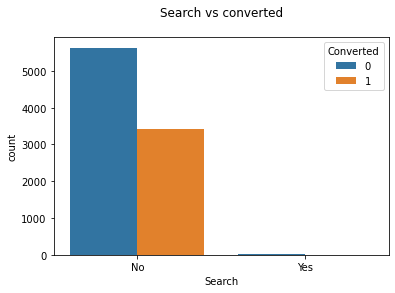

In [71]:
sns.countplot(x = "Search", hue = "Converted", data = df)
plt.title('Search vs converted\n')
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

#### 14) Magazine

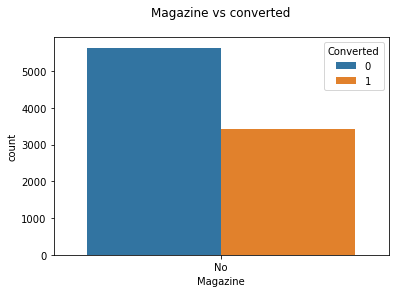

In [72]:
sns.countplot(x = "Magazine", hue = "Converted", data = df)
plt.title('Magazine vs converted\n')
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

#### 15) Newspaper Article

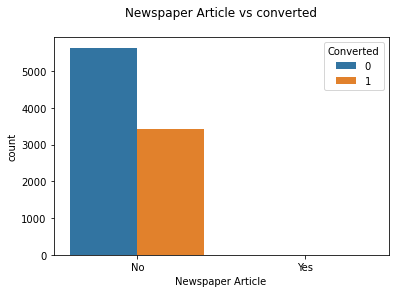

In [73]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df)
plt.title('Newspaper Article vs converted\n')
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

#### 16) X Education Forums

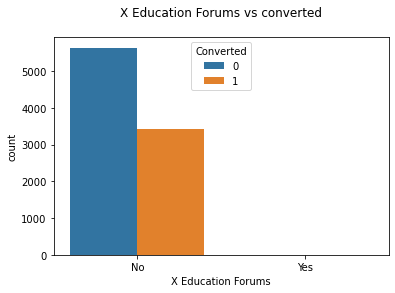

In [74]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = df)
plt.title('X Education Forums vs converted\n')
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

#### 17) Newspaper

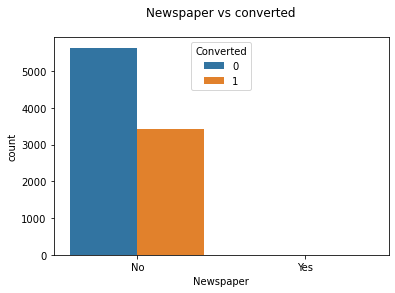

In [75]:
sns.countplot(x = "Newspaper", hue = "Converted", data = df)
plt.title('Newspaper vs converted\n')
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

#### 18) Digital Advertisement

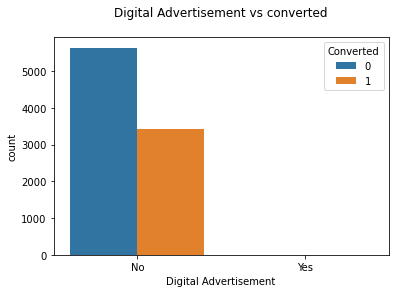

In [76]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df)
plt.title('Digital Advertisement vs converted\n')
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

#### 19) Through Recommendations

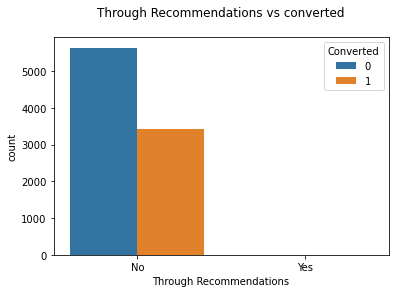

In [77]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df)
plt.title('Through Recommendations vs converted\n')
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

#### 20) Receive More Updates About Our Courses

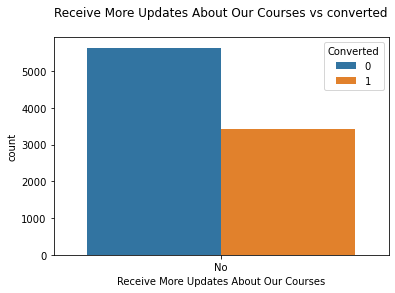

In [78]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df)
plt.title('Receive More Updates About Our Courses vs converted\n')
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.Most entries are 'No'. No Inference can be drawn with this parameter.

#### 21) Tags

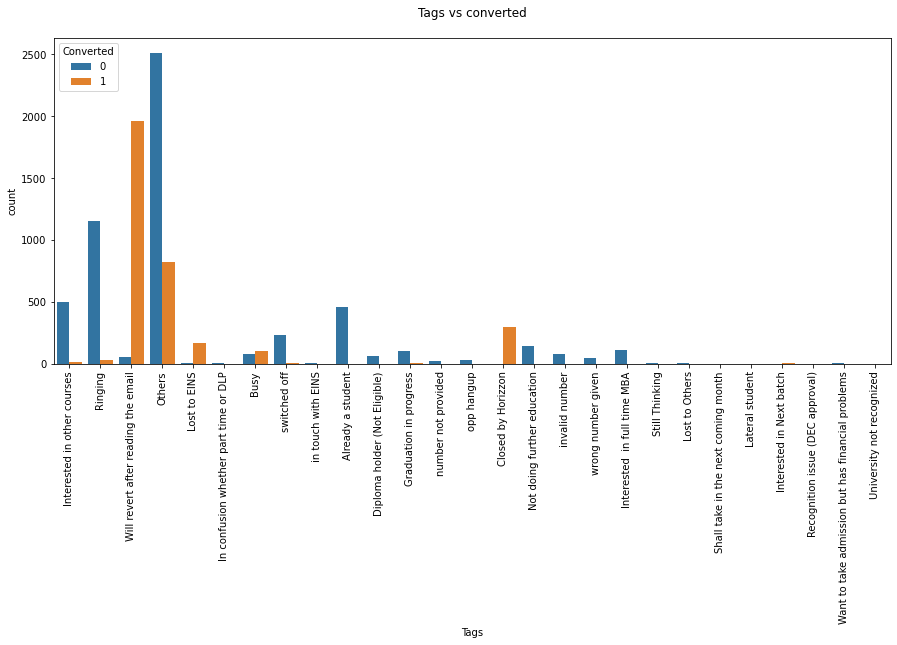

In [79]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.title('Tags vs converted\n')
plt.show()


#### 22) Update me on Supply Chain Content

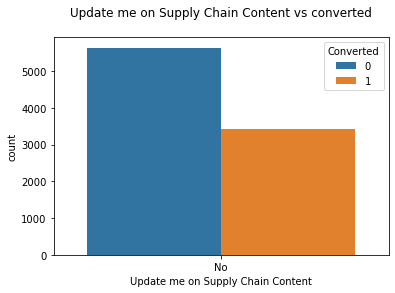

In [80]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = df)
plt.title('Update me on Supply Chain Content vs converted\n')
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

#### 23) Get updates on DM Content

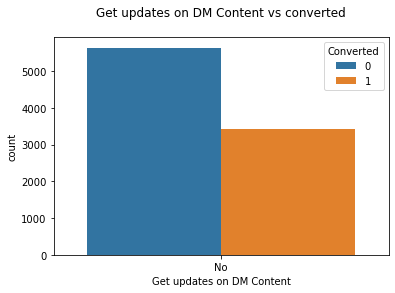

In [81]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = df)
plt.title('Get updates on DM Content vs converted\n')
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

#### 24) City

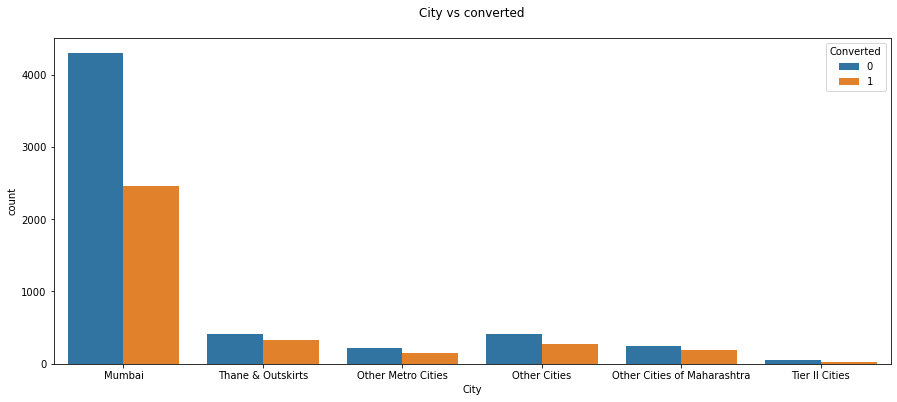

In [82]:
plt.figure(figsize=(15,6))
sns.countplot(x = "City", hue = "Converted", data = df)
plt.title('City vs converted\n')
plt.show()

- Most leads are from mumbai

#### 25) I agree to pay the amount through cheque

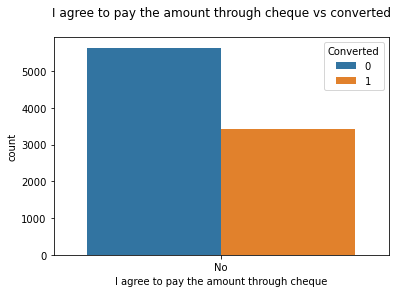

In [83]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df)
plt.title('I agree to pay the amount through cheque vs converted\n')
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

#### 26) A free copy of Mastering The Interview

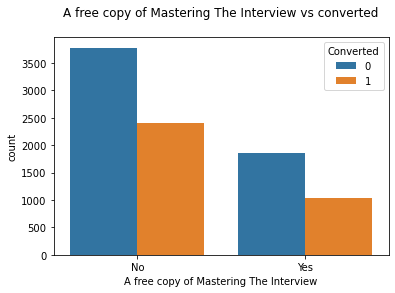

In [84]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df)
plt.title('A free copy of Mastering The Interview vs converted\n')
plt.show()

- Most entries are 'No'. No Inference can be drawn with this param

#### 27) Last Notable Activity

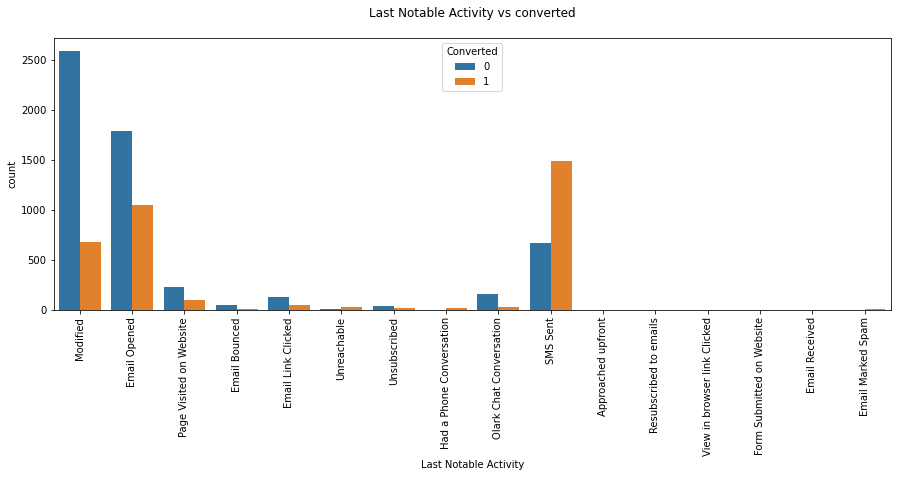

In [85]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.title('Last Notable Activity vs converted\n')
plt.show()

#### - Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysismany columns are not adding any information to the model, hence we can drop them for further analysis

In [86]:
df = df.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
'A free copy of Mastering The Interview'],1)

In [87]:
df.shape

(9074, 14)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

### Data Preparation

### 1) Converting some binary variables (Yes/No) to 1/0

In [89]:
vars =  ['Do Not Email', 'Do Not Call']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df[vars] = df[vars].apply(binary_map)

### 2) Creating Dummy variables for the categorical features:

In [90]:
dummy= pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [91]:
df.drop(['Prospect ID'], axis=1)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.00,Page Visited on Website,Oyhers,Unemployed,Mumbai,Modified
1,API,Organic Search,0,0,0,5.0,674,2.50,Email Opened,Oyhers,Unemployed,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,Converted to Lead,Oyhers,Unemployed,Mumbai,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,Others,IT Projects Management,Unemployed,Mumbai,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Mumbai,SMS Sent
9237,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Mumbai,SMS Sent
9238,Landing Page Submission,Google,0,0,1,3.0,499,3.00,SMS Sent,Human Resource Management,Unemployed,Other Metro Cities,SMS Sent


In [92]:
df = pd.concat([df, dummy], axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Oyhers,Unemployed,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Oyhers,Unemployed,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Oyhers,Unemployed,Mumbai,Modified,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [93]:
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'], axis = 1)

In [94]:
df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### 3) Splitting the data into train and test set.

In [95]:

from sklearn.model_selection import train_test_split

X = df.drop(['Prospect ID','Converted'], axis=1)
X.head()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [96]:
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### 4) Scaling the features

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [99]:
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

- We have almost 38% lead conversion rate.

#### Feature Selection Using RFE

In [100]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [101]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False])

In [102]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 14),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 41),
 ('Lead Source_Others', False, 33),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 53),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 24),
 ('Last Activity_Email Link Clicked', False, 18),
 ('Last Activity_Email Opened', False, 12),
 ('Last Activity_Form Submitted on Website', False, 40),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 17),
 ('Last Activity_SMS Sent', True, 1),
 ('La

In [103]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Oyhers', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

### Model Building

####  Model 1

In [104]:
import statsmodels.api as sm

In [105]:
X_train_sm = sm.add_constant(X_train[cols])
lm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.2
Date:                Tue, 25 Oct 2022   Deviance:                       5194.5
Time:                        22:46:19   Pearson chi2:                 6.50e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0989      0.126     -0.783      0.433      -0.346       0.149
Do Not Email                                            -1.6702      0.190     -8.772      0.000      -2.043      -1.297
Total Time Spent on Website                              1.0995      0.040     27.179      0.000       1.020       1.179
Lead Origin_Landing Page Submission                     -1.1675      0.128     -9.118      0.000      -1.418      -0.917
Lead Origin_Lead Add Form                                3.2673      0.235     13.878      0.000       2.806       3.729
Lead Source_Olark Chat                                   1.0957      0.123      8.910      0.000       0.855       1.337
Lead Source_Welingak Website                             2.5967      0.756      3.434      0.001       1.115       4.079
Last Activity_Olark Chat Conversation                   -0.9423      0.171     -5.495      0.000      -1.278      -0.606
Last Activity_Others                                     2.2060      0.462      4.770      0.000       1.300       3.112
Last Activity_SMS Sent                                   1.3297      0.075     17.642      0.000       1.182       1.477
Last Activity_Unsubscribed                               1.3789      0.482      2.860      0.004       0.434       2.324
Specialization_Oyhers                                   -1.1793      0.126     -9.377      0.000      -1.426      -0.933
What is your current occupation_Housewife               22.7372   1.53e+04      0.001      0.999   -2.99e+04       3e+04
What is your current occupation_Working Professional     2.6155      0.194     13.448      0.000       2.234       2.997
Last Notable Activity_Modified                          -0.8781      0.081    -10.784      0.000      -1.038      -0.718
Last Notable Activity_Unreachable                        1.5571      0.474      3.286      0.001       0.628       2.486
========================================================================================================================
"""

- Since P value of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [106]:
col1 = cols.drop('What is your current occupation_Housewife')

#### Model 2

In [107]:
X_train_sm = sm.add_constant(X_train[col1])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.4
Date:                Tue, 25 Oct 2022   Deviance:                       5202.8
Time:                        22:46:19   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0913      0.126     -0.724      0.469      -0.339       0.156
Do Not Email                                            -1.6724      0.190     -8.783      0.000      -2.046      -1.299
Total Time Spent on Website                              1.0988      0.040     27.190      0.000       1.020       1.178
Lead Origin_Landing Page Submission                     -1.1678      0.128     -9.130      0.000      -1.419      -0.917
Lead Origin_Lead Add Form                                3.2825      0.235     13.959      0.000       2.822       3.743
Lead Source_Olark Chat                                   1.0942      0.123      8.901      0.000       0.853       1.335
Lead Source_Welingak Website                             2.5816      0.756      3.414      0.001       1.100       4.063
Last Activity_Olark Chat Conversation                   -0.9433      0.171     -5.501      0.000      -1.279      -0.607
Last Activity_Others                                     2.2026      0.463      4.761      0.000       1.296       3.109
Last Activity_SMS Sent                                   1.3246      0.075     17.585      0.000       1.177       1.472
Last Activity_Unsubscribed                               1.3761      0.482      2.854      0.004       0.431       2.321
Specialization_Oyhers                                   -1.1841      0.126     -9.422      0.000      -1.430      -0.938
What is your current occupation_Working Professional     2.6109      0.194     13.424      0.000       2.230       2.992
Last Notable Activity_Modified                          -0.8810      0.081    -10.827      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5512      0.474      3.274      0.001       0.623       2.480
========================================================================================================================
"""

### Checking for VIF values:

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Oyhers,2.17
4,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
3,Lead Origin_Lead Add Form,1.61
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
5,Lead Source_Welingak Website,1.37
1,Total Time Spent on Website,1.29
0,Do Not Email,1.21


In [109]:
col1 = col1.drop('Last Activity_Unsubscribed')

#### Model 3

In [110]:
X_train_sm = sm.add_constant(X_train[col1])
lm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.0
Date:                Tue, 25 Oct 2022   Deviance:                       5210.1
Time:                        22:46:19   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0812      0.126     -0.644      0.520      -0.328       0.166
Do Not Email                                            -1.5141      0.177     -8.578      0.000      -1.860      -1.168
Total Time Spent on Website                              1.0999      0.040     27.230      0.000       1.021       1.179
Lead Origin_Landing Page Submission                     -1.1709      0.128     -9.153      0.000      -1.422      -0.920
Lead Origin_Lead Add Form                                3.2713      0.235     13.934      0.000       2.811       3.731
Lead Source_Olark Chat                                   1.0950      0.123      8.912      0.000       0.854       1.336
Lead Source_Welingak Website                             2.5586      0.755      3.389      0.001       1.079       4.038
Last Activity_Olark Chat Conversation                   -0.9493      0.171     -5.538      0.000      -1.285      -0.613
Last Activity_Others                                     2.1907      0.463      4.735      0.000       1.284       3.098
Last Activity_SMS Sent                                   1.3090      0.075     17.457      0.000       1.162       1.456
Specialization_Oyhers                                   -1.1849      0.126     -9.433      0.000      -1.431      -0.939
What is your current occupation_Working Professional     2.6118      0.194     13.468      0.000       2.232       2.992
Last Notable Activity_Modified                          -0.8880      0.081    -10.923      0.000      -1.047      -0.729
Last Notable Activity_Unreachable                        1.5402      0.473      3.255      0.001       0.613       2.468
========================================================================================================================
"""

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Oyhers,2.17
4,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.70
3,Lead Origin_Lead Add Form,1.61
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.56
5,Lead Source_Welingak Website,1.37
1,Total Time Spent on Website,1.29
10,What is your current occupation_Working Profes...,1.18


In [112]:
col1 = col1.drop('Last Notable Activity_Unreachable')

#### Model 4

In [113]:
X_train_sm = sm.add_constant(X_train[col1])
lm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.5
Date:                Tue, 25 Oct 2022   Deviance:                       5220.9
Time:                        22:46:20   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0568      0.126     -0.452      0.651      -0.303       0.190
Do Not Email                                            -1.5167      0.176     -8.595      0.000      -1.863      -1.171
Total Time Spent on Website                              1.0965      0.040     27.203      0.000       1.017       1.175
Lead Origin_Landing Page Submission                     -1.1758      0.128     -9.201      0.000      -1.426      -0.925
Lead Origin_Lead Add Form                                3.2592      0.235     13.893      0.000       2.799       3.719
Lead Source_Olark Chat                                   1.0845      0.123      8.843      0.000       0.844       1.325
Lead Source_Welingak Website                             2.5577      0.755      3.388      0.001       1.078       4.037
Last Activity_Olark Chat Conversation                   -0.9561      0.171     -5.580      0.000      -1.292      -0.620
Last Activity_Others                                     2.1788      0.463      4.709      0.000       1.272       3.086
Last Activity_SMS Sent                                   1.2937      0.075     17.306      0.000       1.147       1.440
Specialization_Oyhers                                   -1.1885      0.126     -9.469      0.000      -1.435      -0.943
What is your current occupation_Working Professional     2.6128      0.194     13.488      0.000       2.233       2.992
Last Notable Activity_Modified                          -0.8999      0.081    -11.091      0.000      -1.059      -0.741
========================================================================================================================
"""

### Checking for VIF values:

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Oyhers,2.16
4,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.69
3,Lead Origin_Lead Add Form,1.61
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.56
5,Lead Source_Welingak Website,1.37
1,Total Time Spent on Website,1.29
10,What is your current occupation_Working Profes...,1.18


#### Making Prediction on the Train set

In [115]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.196500
1012    0.128179
9226    0.322693
4750    0.865640
7987    0.797935
1281    0.743889
2880    0.099845
4971    0.965257
7536    0.854745
1248    0.768242
dtype: float64

In [116]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19649999, 0.12817853, 0.32269332, 0.8656402 , 0.79793481,
       0.74388947, 0.09984534, 0.9652566 , 0.85474455, 0.76824211])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.196500,3009
1,0,0.128179,1012
2,0,0.322693,9226
3,1,0.865640,4750
4,1,0.797935,7987


- Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels
- Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [118]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.196500,3009,0
1,0,0.128179,1012,0
2,0,0.322693,9226,0
3,1,0.865640,4750,1
4,1,0.797935,7987,1


### Fissy matrix

In [119]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3461  444]
 [ 717 1729]]


In [120]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8171941426547


In [121]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Metrics beyond simply accuracy

In [122]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7068683565004088


In [123]:
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8862996158770806


In [124]:
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11370038412291933


In [125]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.795674183156926


In [126]:
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8283867879368119


#### Specificity is around 88%.
- Sensitivity is 70% as the cut-off point of 0.5 that is arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

### Ploting the ROC Curve

In [127]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

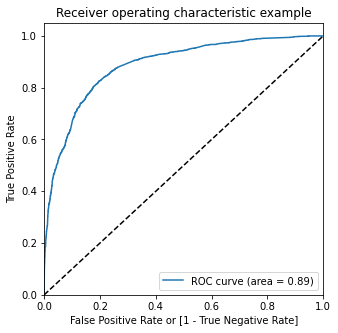

In [128]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- Since we have higher (0.89) area under the ROC curve.

- Finding Optimal Cutoff Point
- We had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.

In [129]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.196500,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.128179,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.322693,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.865640,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.797935,7987,1,1,1,1,1,1,1,1,1,0,0


In [130]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.586994  0.973426  0.344942
0.2   0.2  0.748229  0.916599  0.642766
0.3   0.3  0.801764  0.850368  0.771319
0.4   0.4  0.816879  0.773917  0.843790
0.5   0.5  0.817194  0.706868  0.886300
0.6   0.6  0.797197  0.601390  0.919846
0.7   0.7  0.786333  0.529845  0.946991
0.8   0.8  0.759565  0.419869  0.972343
0.9   0.9  0.721304  0.296402  0.987452


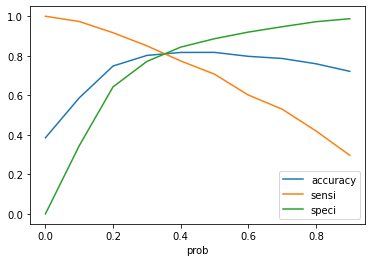

In [131]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- M From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.196500,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.128179,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.322693,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.865640,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.797935,7987,1,1,1,1,1,1,1,1,1,0,0,1


###  Assigning Lead Score to the Training data

In [133]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8142024877971973


In [134]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3186,  719],
       [ 461, 1985]], dtype=int64)

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8115290269828291


In [137]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8158770806658131


In [138]:
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.18412291933418695


In [139]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7340976331360947


In [140]:
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.873594735398958


### Precision and Recall
- Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
- Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [141]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.795674183156926


In [142]:
TP / TP + FN
print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7068683565004088


In [143]:
from sklearn.metrics import precision_score, recall_score
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.795674183156926


In [144]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7068683565004088


### Precision and recall tradeoff¶

In [145]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

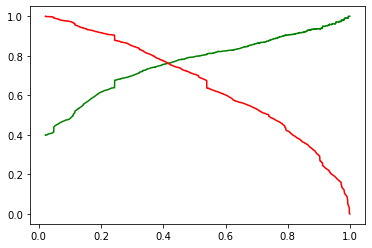

In [146]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Prediction on train set.


In [147]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.196500,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.128179,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.322693,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.865640,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.797935,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [148]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3315,  590],
       [ 571, 1875]], dtype=int64)

In [149]:
TP / (TP + FP)

0.7340976331360947

In [150]:
TP / (TP + FN)

0.8115290269828291

### Making predictions on the test set
### Scaling the test data

In [151]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Oyhers,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0
4216,0,-0.888650,0,1,0,0,0,0,0,0,0,1
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0


In [152]:
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.129670
1490    0.969220
7936    0.111962
4216    0.790523
3830    0.132727
1800    0.636153
6507    0.342136
4821    0.302598
4223    0.911586
4714    0.322693
dtype: float64

In [153]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.129670
1490,0.969220
7936,0.111962
4216,0.790523
3830,0.132727


In [154]:
y_test_1 = pd.DataFrame(y_test)

y_test_1['Prospect ID'] = y_test_1.index
 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_1.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_1, y_pred_1],axis=1)

In [155]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.129670
1,1,1490,0.969220
2,0,7936,0.111962
3,1,4216,0.790523
4,0,3830,0.132727


In [156]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [157]:
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.129670
1,1490,1,0.969220
2,7936,0,0.111962
3,4216,1,0.790523
4,3830,0,0.132727


In [158]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.129670,0
1,1490,1,0.969220,1
2,7936,0,0.111962,0
3,4216,1,0.790523,1
4,3830,0,0.132727,0


In [159]:
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

Accuracy : 0.808666911494675


array([[1410,  324],
       [ 197,  792]], dtype=int64)

In [160]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [161]:
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8008088978766431


In [162]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8131487889273357


In [163]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.41 else 0)

print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8196841718692618


In [164]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

TP / (TP + FP)

0.7417475728155339

In [165]:
TP / (TP + FN)

0.7724974721941354

### Assigning Lead Score to the Testing data


In [166]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.129670,0,13
1,1490,1,0.969220,1,97
2,7936,0,0.111962,0,11
3,4216,1,0.790523,1,79
4,3830,0,0.132727,0,13


### Observations:
- After running the model on the Test Data , we obtain:

- Accuracy : 80.87 %

- Sensitivity : 80.08 %

- Specificity : 81.31 %

### Results :
#### 1) Comparing the values obtained for Train & Test:
- Train Data:
- Accuracy : 81.42%

- Sensitivity : 81.16 %

- Specificity : 81.59 %

- Test Data:
- Accuracy : 80.87 %

- Sensitivity : 80.08 %

- Specificity : 81.31 %

- The Model seems to predict the Conversion Rate very well to get a higher lead conversion rate of 80%.

#### 2) Finding out the leads which should be contacted:
- The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [167]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.969220,1,97
8,4223,1,0.911586,1,91
16,1946,1,0.923274,1,92
21,2461,1,0.992541,1,99
23,5822,1,0.997838,1,100
...,...,...,...,...,...
2694,1566,1,0.947966,1,95
2699,6461,1,0.960898,1,96
2703,5741,1,0.908335,1,91
2715,6299,1,0.871534,1,87


- So there are 369 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :



In [168]:
print("The Prospect ID of the customers who should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers who should be contacted are :


array([1490, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518,
       4543, 4830, 4365, 3542, 2504, 7674, 8596, 4003, 4963, 6947, 4807,
        446,  789, 8372, 5805, 3758, 1561, 5367,  737, 6423, 8286, 7174,
       4461, 1436, 7552, 3932, 4080, 1475, 5785, 1867, 2860, 7253, 4297,
       5490, 1995, 4498, 5797, 8687,  831, 7653, 2018, 6743, 3976, 5769,
       1051, 1663, 3288, 8959, 7521, 8282, 8213, 9063, 5292, 6913, 1481,
        785, 3265, 3285, 7433, 3858, 3810, 2009, 8106,  373, 7417, 4179,
       8568, 7268, 6784, 6754, 7236, 2960, 7753, 3983,  802, 8745, 4717,
        505, 8509, 6094, 4992, 7036, 2680, 7065,  112, 6149, 7157, 7175,
       1675, 6999, 5826, 8492, 6499, 2481, 3439, 4612, 7129, 4793, 4837,
       2495,  822, 8111, 2378, 5075, 7699, 5638, 2342, 8077, 2727,  720,
       7489, 2961, 1542, 5656, 2630, 6728, 8205, 6332, 8461, 2427, 5087,
        174, 2674, 8065, 2095, 1568, 8597, 4865, 3535, 4708, 1304, 6066,
       6538, 5700, 1388, 5815, 7970, 7902, 5804, 78

### 3) Finding out the Important Features from our final model:

In [169]:
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.259203
What is your current occupation_Working Professional    2.612803
Lead Source_Welingak Website                            2.557720
Last Activity_Others                                    2.178797
Last Activity_SMS Sent                                  1.293683
Total Time Spent on Website                             1.096487
Lead Source_Olark Chat                                  1.084536
const                                                  -0.056814
Last Notable Activity_Modified                         -0.899915
Last Activity_Olark Chat Conversation                  -0.956088
Lead Origin_Landing Page Submission                    -1.175784
Specialization_Oyhers                                  -1.188519
Do Not Email                                           -1.516692
dtype: float64

#### Recommendations:
- The company should make calls to the leads coming from the Lead Origin_Lead Add Form, What is your current occupation_Working Professional and Lead Source_Welingak Website, those whose last activity is sms sent", who spent "more time on the websites" as they are more likely to get converted.

- The company should not make calls to the leads whose last activity was "Olark Chat Conversation" , leads whose lead origin is "Landing Page Submission" , leads whose Specialization was "Others" , leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.